# CLZ - Binary Classification Problem 

In [82]:
# load base modules
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [83]:
# loading adjusted & cleaned dataset with targets
data = pd.read_csv("data_revd.csv")

In [84]:
# droping course_id
data = data.drop('course_id', axis=1)

In [85]:
# encoding categorical features (course_type & course_category)
data['course_type'] = data['course_type'].astype('category')
data['course_type'] = data["course_type"].cat.codes
data['course_category'] = data['course_category'].astype('category')
data['course_category'] = data["course_category"].cat.codes

In [86]:
# defining X and y
X = data.drop(['keep'], axis=1)
y = data['keep']

## Scaling DataFrame with sklearn StandardScaler

In [87]:
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(X)
X = transformer.transform(X)
pd.DataFrame(X).head(1)

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,4.815262,-0.230023,-0.522054,-0.363657,-0.164399,0.600496,-0.164399,-0.11547,0.0,0.0,...,12.288206,-0.389249,0.0,0.0,0.0,1.67332,0.796498,-0.081379,-0.785507,0.0


## Train-Test-Split 

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

## Cross Validation with GridSearchCV
Performing hyperparameter tuning in order to determine the optimal values for a given model.

In [89]:
from sklearn.model_selection import GridSearchCV

### Grid Search on Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
# assigning paramenters to variables
penalty_options=['l1', 'l2', 'elasticnet', 'none']
solver_options = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
multi_class_options = ['ovr', 'multinomial']
class_weight_options = ['None', 'balanced']
lr = LogisticRegression()    

# applying grid with vars
param_grid = dict(penalty=penalty_options, solver = solver_options, multi_class = 
multi_class_options, class_weight = class_weight_options)
logreg_grid = GridSearchCV(lr, param_grid, cv=12, scoring = 'accuracy', )
logreg_grid.fit(X_train,y_train)
print ('\n Parameters for LogisticRegression: \n', logreg_grid.best_params_)


 Parameters for LogisticRegression: 
 {'class_weight': 'None', 'multi_class': 'ovr', 'penalty': 'none', 'solver': 'newton-cg'}


### Grid Search on Decission Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
dtree_grid = GridSearchCV(estimator=DecisionTreeClassifier(),
                            param_grid={'max_leaf_nodes': list(range(2, 20)), 'min_samples_split': [2, 3, 4]},
                            scoring="accuracy",
                            cv=10)
dtree_grid.fit(X_train,y_train)
print ('\n Parameters for LogisticRegression: \n', dtree_grid.best_params_)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19],
                         'min_samples_split': [2, 3, 4]},
             scoring='accuracy')

### Grid Search on Random Forest

In [108]:
from sklearn.ensemble import RandomForestClassifier
Rforest_grid = GridSearchCV(estimator=RandomForestClassifier(),
                            param_grid={"n_estimators": list(range(50, 100)),
                                        "criterion":["gini", "entropy"],
                                        "max_depth":[5,6,7,8,9,12],
                                        "min_samples_split" : [2,3,4],
                                        "max_leaf_nodes": list(range(2, 5))
                                       },                            
                            scoring="accuracy",
                            cv=10)
Rforest_grid.fit(X_train,y_train)
print ('\n Parameters for LogisticRegression: \n', Rforest_grid.best_params_)



 Parameters for LogisticRegression: 
 {'criterion': 'entropy', 'max_depth': 12, 'max_leaf_nodes': 4, 'min_samples_split': 2, 'n_estimators': 69}


## Selecting Models and applying Parameters

In [91]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [109]:
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(penalty = 'l1',
                            class_weight = 'balanced',
                            multi_class = 'ovr',
                            solver = 'liblinear')
logreg.fit(X_train,y_train)
y_pred_log = logreg.predict(X_test)

print ('\nAccuracy of logistic regression classifier on test set: {:.2F}'.format(logreg.score(X_test,y_test)))
print('\n',confusion_matrix(y_test,y_pred_log))
print(classification_report(y_test, y_pred_log))




# DECISSION TREE
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_leaf_nodes=84, min_samples_split=2)
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)

print ('\nAccuracy DecisionTreeClassifier on test set: {:.2F}'.format(dtc.score(X_test,y_test)))
print('\n',confusion_matrix(y_test,y_pred_dtc))
print(classification_report(y_test, y_pred_dtc))


# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion = 'entropy', 
                             max_depth = 12, 
                             max_leaf_nodes = 4, 
                             min_samples_split = 2,
                             n_estimators = 69) 
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
print ('\nAccuracy Random Forest on test set: {:.2F}'.format(rfc.score(X_test,y_test)))
print('\n',confusion_matrix(y_test,y_pred_rfc))
print(classification_report(y_test, y_pred_rfc))


Accuracy of logistic regression classifier on test set: 0.84

 [[17  4]
 [ 2 15]]
              precision    recall  f1-score   support

           0       0.89      0.81      0.85        21
           1       0.79      0.88      0.83        17

    accuracy                           0.84        38
   macro avg       0.84      0.85      0.84        38
weighted avg       0.85      0.84      0.84        38


Accuracy DecisionTreeClassifier on test set: 0.79

 [[16  5]
 [ 3 14]]
              precision    recall  f1-score   support

           0       0.84      0.76      0.80        21
           1       0.74      0.82      0.78        17

    accuracy                           0.79        38
   macro avg       0.79      0.79      0.79        38
weighted avg       0.80      0.79      0.79        38


Accuracy Random Forest on test set: 0.84

 [[18  3]
 [ 3 14]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        21
           1       

In [93]:
import graphviz
from sklearn import tree

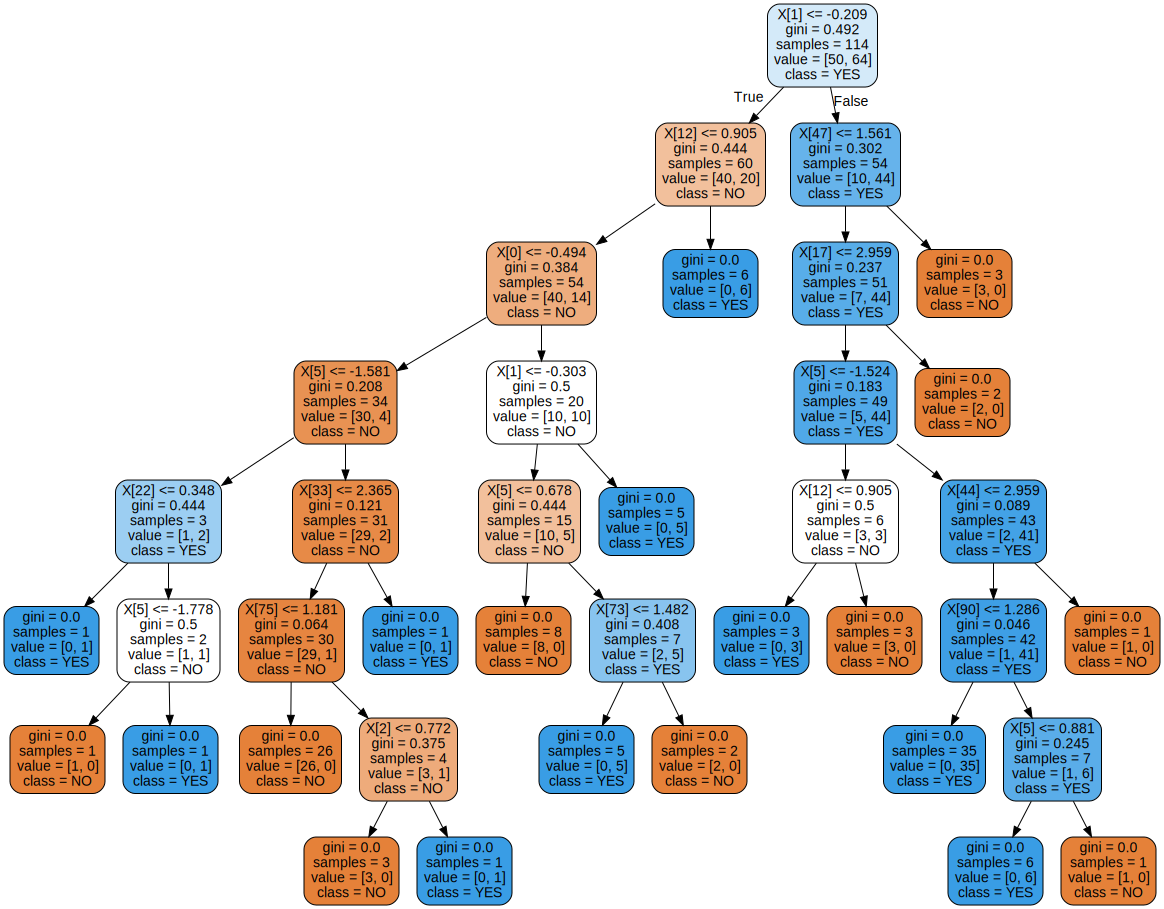

In [94]:
dot_data = tree.export_graphviz(dtc, class_names=['NO', 'YES'],
                     filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

## Receiver Operating Characteristic Curve

In [95]:
import matplotlib.pyplot as plt

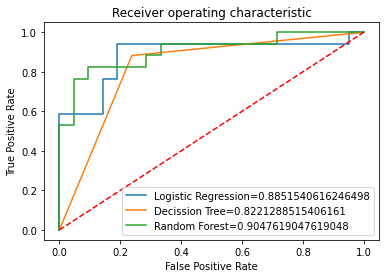

In [96]:
y_pred_proba_log = logreg.predict_proba(X_test)[::,1]
fpr_log, tpr_log, _ = metrics.roc_curve(y_test,  y_pred_proba_log)
auc = metrics.roc_auc_score(y_test, y_pred_proba_log)
plt.plot(fpr_log, tpr_log,label="Logistic Regression="+str(auc))

y_pred_proba_dtc = dtc.predict_proba(X_test)[::,1]
fpr_dtc, tpr_dtc, _ = metrics.roc_curve(y_test,  y_pred_proba_dtc)
auc = metrics.roc_auc_score(y_test, y_pred_proba_dtc)
plt.plot(fpr_dtc, tpr_dtc,label="Decission Tree="+str(auc))

y_pred_proba_rfc = rfc.predict_proba(X_test)[::,1]
fpr_rfc, tpr_rfc, _ = metrics.roc_curve(y_test,  y_pred_proba_rfc)
auc = metrics.roc_auc_score(y_test, y_pred_proba_rfc)
plt.plot(fpr_rfc, tpr_rfc,label="Random Forest="+str(auc))


plt.plot([0, 1], [0, 1],'r--')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Applying Dataset to trained Model

In [32]:
# loading cleaned dataframe
df_ = pd.read_csv("data.csv")
df_.shape

(902, 102)

In [33]:
# droping course_id
data_ = df_.drop('course_id', axis=1)

In [34]:
# encoding categoricals for standardscaler
data_['course_type'] = data_['course_type'].astype('category')
data_['course_type'] = data_["course_type"].cat.codes
data_['course_category'] = data_['course_category'].astype('category')
data_['course_category'] = data_["course_category"].cat.codes
X = data_

In [36]:
# scaling numericals in DataFrame
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(X)
X = transformer.transform(X)
pd.DataFrame(X).head(2)

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,10.108318,-0.198617,-0.602355,-0.488377,-0.2923,-0.488178,-0.165333,-0.165333,-0.04714,-0.033315,...,-0.125562,-0.732548,-0.033315,-0.04714,-0.368809,-0.285543,0.538902,-0.237078,-0.287807,-0.324642
1,9.895770,-0.182381,-0.602355,-0.488377,-0.2923,0.736160,-0.165333,-0.165333,-0.04714,-0.033315,...,7.964206,-0.732548,-0.033315,-0.04714,-0.368809,-0.285543,0.538902,-0.237078,-0.287807,-0.324642


In [37]:
# applying trained Random Forest
y_pred = rfc.predict(X)

In [38]:
# converting into a dataframe
y_pred = pd.DataFrame(y_pred)

In [41]:
# loading data for lable purpose
df_course = pd.read_csv('df_course.csv')

In [49]:
# trimming the frame ro have only neccarly columns
df_cut = df_course[['course_id','category_id','course_name']]

In [50]:
# adding the predicted column
data_final = pd.concat((df_cut, y_pred), axis=1)

In [53]:
# renaming columns
data_final.columns = ['Course ID','Category ID','Course Name', 'Retain']
# renaming values in Retain column 
data_final['Retain'] = data_final['Retain'].map({0 : 'No', 1 : 'Yes'})

In [111]:
# save final dataframe to csv
data_final.to_csv(r'/users/mzimmermann/ironhack/CLZ/cleaned_files/data_final.csv', index = False)
data_final = data_final.drop('Course Name', axis=1)

In [112]:
data_final

,Course ID,Category ID,Retain
0,2,494,No
1,6,494,Yes
2,8,494,Yes
3,11,494,Yes
4,12,494,Yes
...,...,...,...
897,1294,494,Yes
898,1295,494,Yes
899,1296,494,Yes
900,1297,497,No
